# 타이타닉 승객 데이터 분석

## (1) 결측 데이터 처리

---
### 1. 필요 package import

In [1]:
import seaborn as sns
import pandas as pd

### 2. seaborn 패키지에서 titanic 데이터 갖고 오기

In [4]:
titanic = sns.load_dataset('titanic')
titanic.to_csv('C:/Users/s/Desktop/data/titanic.csv', index = False)

In [5]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


### 3. 주요 변수 확인

* survived : 생존 여부, 1(생존) / 0(사망)
* alive : 생존 여부, yes(생존) / no(사망)
* pclass, class : 객실 등급
* sibsp : 함께 탑승한 형제자매, 배우자 수
* parch : 함꼐 탑승한 부모/자식 수
* embarked, embark_town : 탑승 항구
* adult_male : 성인 남자 여부
* alone : 동행 여부 (True/False)

### 4. 결측 데이터 확인

In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

age, embarked, deck, embark_town 변수에 결측 존재

age 변수는 수치형 자료이므로 결측을 제외한 나머지 자료의 중앙값으로 대체

나머지 변수들은 결측을 제외한 나머지 자료의 최빈값으로 대체

In [8]:
# age 변수 결측 중앙값으로 채우기
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [9]:
# embarked 변수 결측 최빈값으로 채우기
titanic['embarked'].value_counts() # 최빈값: S
titanic['embarked'] = titanic['embarked'].fillna('S')

In [10]:
# deck 변수 결측 최빈값으로 채우기
titanic['deck'].value_counts() # 최빈값: C
titanic['deck'] = titanic['deck'].fillna('C')

In [11]:
# embark_town 변수 결측 최빈값으로 채우기
titanic['embark_town'].value_counts() # 최빈값 'Southampton'
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [12]:
# 최종 결측 확인
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

---
## (2) 데이터 탐색

### 1. 데이터 정보 확인

In [13]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


### 2. 생존 정보 확인

In [16]:
titanic.survived.value_counts()

0.38

In [17]:
# 생존률
round(titanic.survived.value_counts()[1] / sum(titanic.survived.value_counts()), 2)

0.38

### 3. 차트를 통한 생존 정보 시각적 탐색

In [18]:
import matplotlib.pyplot as plt

### 3-1. 성별에 따른 생존 정보(파이 차트)

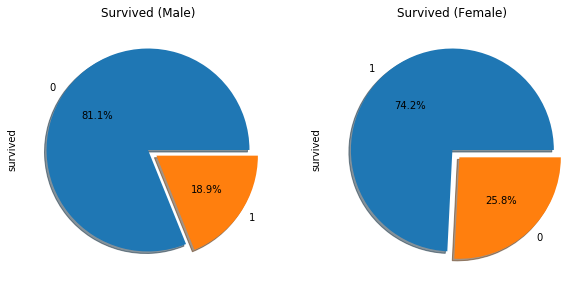

In [24]:
# 1 X 2 행렬의 차트
f, ax = plt.subplots(1, 2, figsize = (10, 5))

# 남성, 여성 각각의 생존율 파이 차트
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow=True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[1], shadow=True)

# 차트 제목
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')

plt.show()

### 3-2. 객실 등급별 생존 정보(막대 그래프)

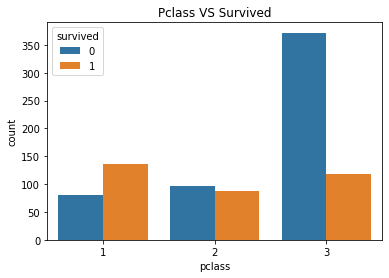

In [23]:
sns.countplot('pclass', hue='survived', data=titanic)
plt.title('Pclass VS Survived')
plt.show()

---
## (3) 데이터 모델링 및 시각화

### 1. correlation analysis (상관분석), 상관계수 계산


타이타닉 승객의 속성과 생존 사이의 상관관계에 대한 분석

상관계수 계산은 수치형 데이터 에서만 가능 (총 8개)

survived, pclass, age, sibsp, parch, fare, adult_male, alone

In [25]:
titanic_corr = titanic.corr(method = 'pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [26]:
# pandas
print(titanic_corr.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, survived to alone
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    8 non-null      float64
 1   pclass      8 non-null      float64
 2   age         8 non-null      float64
 3   sibsp       8 non-null      float64
 4   parch       8 non-null      float64
 5   fare        8 non-null      float64
 6   adult_male  8 non-null      float64
 7   alone       8 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes
None


In [27]:
# 특정 변수 사이의 상관 계수 확인
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053258

### 2. 결과 시각화(1) 산점도

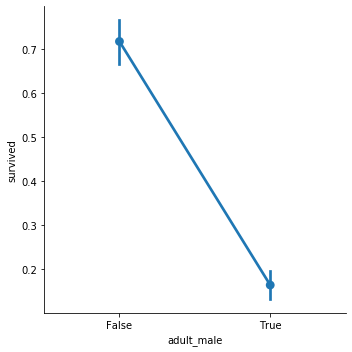

In [29]:
sns.catplot(x = 'adult_male', y = 'survived', data = titanic, kind = 'point')
plt.show()

### 3. 결과 시각화(2) 두 변수의 상관관계 시각화

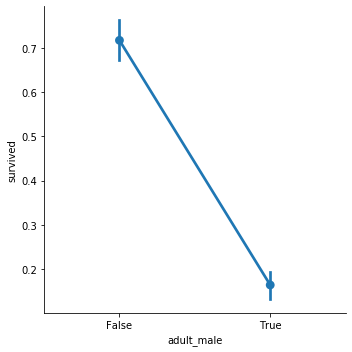

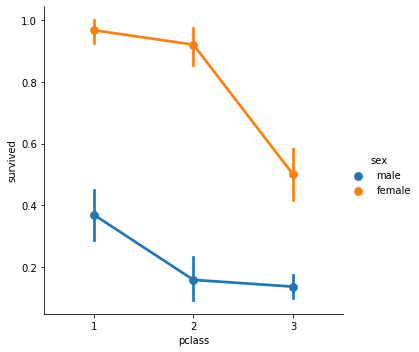

In [30]:
sns.catplot(x = 'adult_male', y = 'survived', data = titanic, kind = 'point')
plt.show()

sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')
plt.show()